<a href="https://colab.research.google.com/github/mauricioaalmeida/ONE-ML/blob/main/Desafio_RL_Hoteis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###M Mão na massa: análise e seleção de modelos de regressão linear


Como pessoa Cientista de Dados, você está encarregada pela análise do problema de precificação de quartos de hotéis, fazendo uso do conjunto de dados fornecidos. Para isso, você dispõe desse dataset.

Nesta atividade, sua tarefa envolve conduzir as seguintes etapas:

    análise inicial com o PairPlot da Seaborn;
    construir modelos de regressão linear; e
    realizar a comparação desses modelos.

Dedique-se às atividades e desenvolva as suas habilidades por meio da aplicação do seu conhecimento adquirido ao longo do curso.


In [16]:
# Bibliotecass
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.metrics import r2_score

In [2]:
url = 'https://raw.githubusercontent.com/mauricioaalmeida/ONE-ML/refs/heads/main/data/hoteis.csv'
df = pd.read_csv(url)


In [3]:
df

,Estrelas,ProximidadeTurismo,Capacidade,Preco
0,5,9.301565,3,506.275452
1,1,1.785891,1,246.363458
2,4,15.504293,3,325.873550
3,4,4.173188,3,521.343284
4,4,9.443685,1,252.587087
...,...,...,...,...
995,5,11.277836,2,374.823064
996,4,8.811311,2,323.147993
997,2,10.329892,4,409.372235
998,2,9.239120,3,434.881278


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Estrelas            1000 non-null   int64  
 1   ProximidadeTurismo  1000 non-null   float64
 2   Capacidade          1000 non-null   int64  
 3   Preco               1000 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 31.4 KB


In [12]:
corr =df.corr()
corr

,Estrelas,ProximidadeTurismo,Capacidade,Preco
Estrelas,1.000000,0.005237,-0.023200,0.401099
ProximidadeTurismo,0.005237,1.000000,-0.027050,-0.697142
Capacidade,-0.023200,-0.027050,1.000000,0.531866
Preco,0.401099,-0.697142,0.531866,1.000000


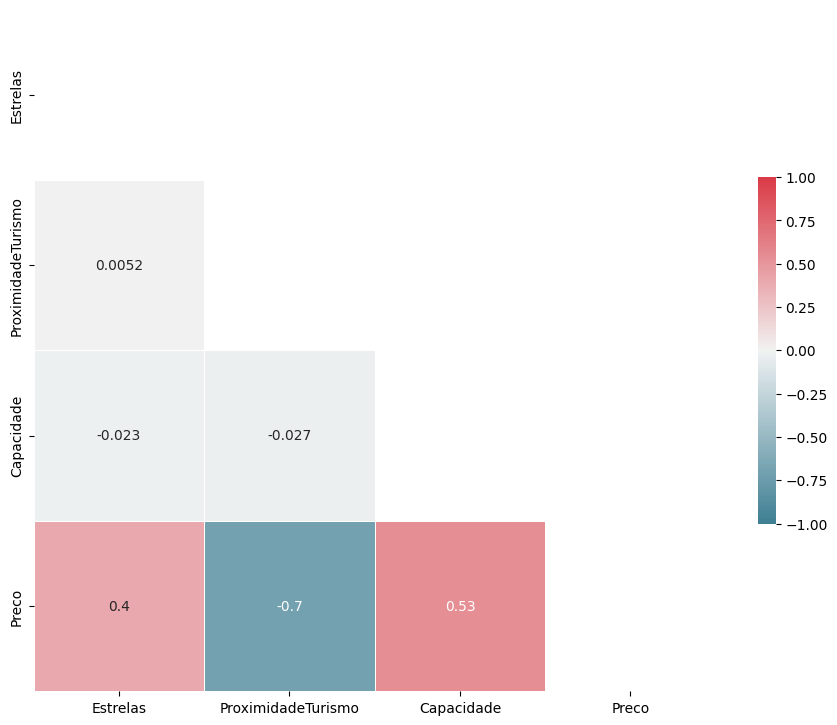

In [13]:

# Gerar uma máscara para o triângulo superior
mascara = np.zeros_like(corr, dtype=bool)
mascara[np.triu_indices_from(mascara)] = True

# Configurar a figura do matplotlib
f, ax = plt.subplots(figsize=(11, 9))

# Gerar o mapa de calor (heatmap)
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mascara, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .5})

# Exibir o mapa de calor (heatmap)
plt.show()

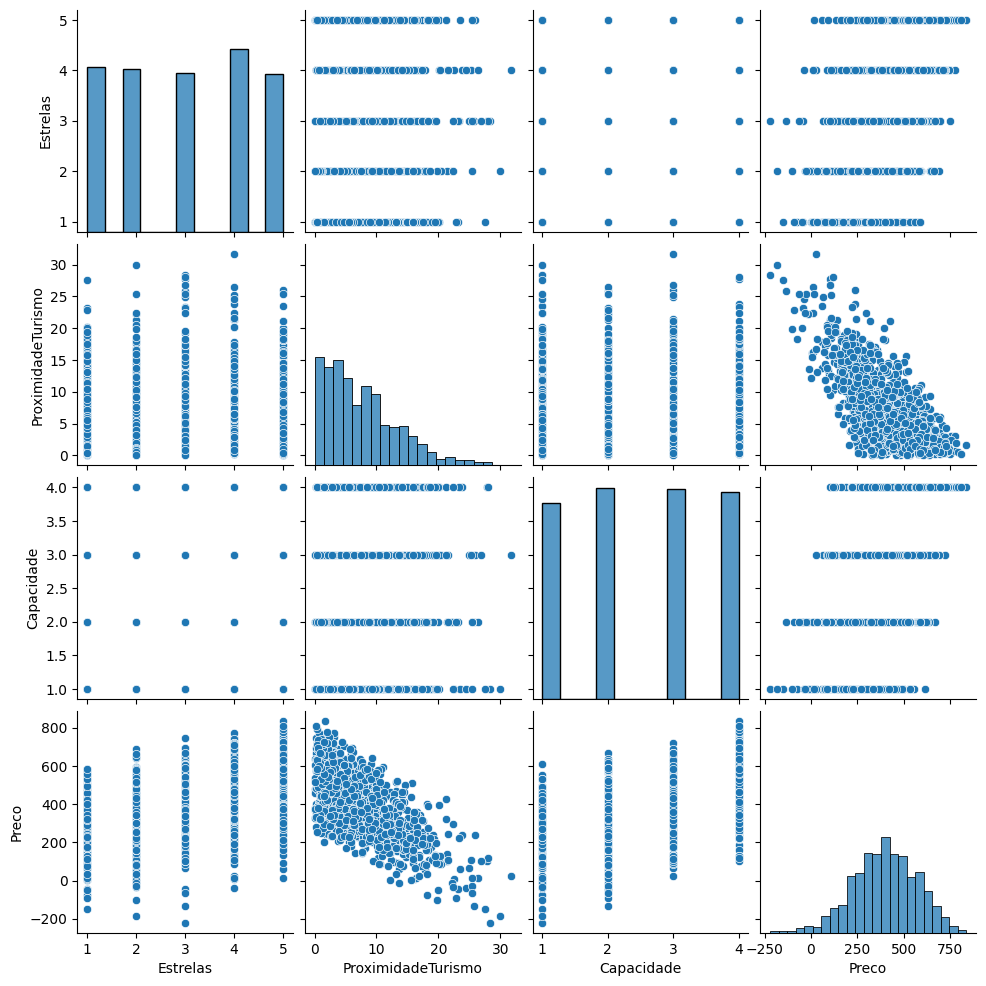

In [5]:
sns.pairplot(df)

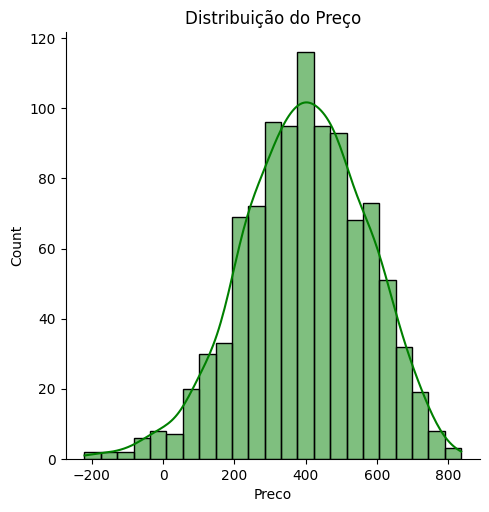

In [14]:

sns.displot(df['Preco'], kde=True, color='green')
plt.title('Distribuição do Preço')
plt.show()

In [108]:
parametros = []
# Definindo y e X
y = df['Preco']
X = df.drop(columns = 'Preco')
# Aplicando o split do y e X
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)
# Adicionando Constante necessária para o modelo
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)
# Dados de treino para comparação
df_train = pd.DataFrame(data= X_train)
df_train['Preco'] = y_train
# Parametros usados em cada rodada
parametros.append(X_train.columns.to_list())
parametros.append(X_train.columns.to_list()[:-1])
parametros.append(X_train.columns.to_list()[:-2])
parametros.append(X_train.columns.drop('ProximidadeTurismo').to_list())
parametros.append(X_train.columns.drop('Estrelas').to_list())
parametros

[['const', 'Estrelas', 'ProximidadeTurismo', 'Capacidade'],
 ['const', 'Estrelas', 'ProximidadeTurismo'],
 ['const', 'Estrelas'],
 ['const', 'Estrelas', 'Capacidade'],
 ['const', 'ProximidadeTurismo', 'Capacidade']]

In [106]:
X_train

,const,Estrelas,ProximidadeTurismo,Capacidade
498,1.0,5,7.316589,4
243,1.0,3,3.698012,3
314,1.0,5,10.304383,2
202,1.0,5,14.111721,3
300,1.0,5,25.944246,3
...,...,...,...,...
988,1.0,5,3.559515,2
322,1.0,4,12.986867,1
382,1.0,3,3.595044,4
365,1.0,2,8.299862,2


In [109]:
modelos = []
print("            R²     Qtd de Parametros")
print('==============================================================================================')

for i in range(len(parametros)):
  modelos.append(sm.OLS(y_train, X_train[parametros[i]]).fit())
  print(f' Modelo {i}: {modelos[i].rsquared:.4f} - {len(modelos[i].params)} parametros: {parametros[i]}')
  print('----------------------------------------------------------------------------------------------')


  # print(modelos[i].summary())

            R²     Qtd de Parametros
 Modelo 0: 0.9203 - 4 parametros: ['const', 'Estrelas', 'ProximidadeTurismo', 'Capacidade']
----------------------------------------------------------------------------------------------
 Modelo 1: 0.6389 - 3 parametros: ['const', 'Estrelas', 'ProximidadeTurismo']
----------------------------------------------------------------------------------------------
 Modelo 2: 0.1488 - 2 parametros: ['const', 'Estrelas']
----------------------------------------------------------------------------------------------
 Modelo 3: 0.4302 - 3 parametros: ['const', 'Estrelas', 'Capacidade']
----------------------------------------------------------------------------------------------
 Modelo 4: 0.7389 - 3 parametros: ['const', 'ProximidadeTurismo', 'Capacidade']
----------------------------------------------------------------------------------------------


In [84]:
df_train

,const,Estrelas,ProximidadeTurismo,Capacidade,Preco
498,1.0,5,7.316589,4,542.683986
243,1.0,3,3.698012,3,466.829317
314,1.0,5,10.304383,2,401.408214
202,1.0,5,14.111721,3,448.438199
300,1.0,5,25.944246,3,237.934392
...,...,...,...,...,...
988,1.0,5,3.559515,2,521.781700
322,1.0,4,12.986867,1,249.431056
382,1.0,3,3.595044,4,603.390852
365,1.0,2,8.299862,2,298.544065


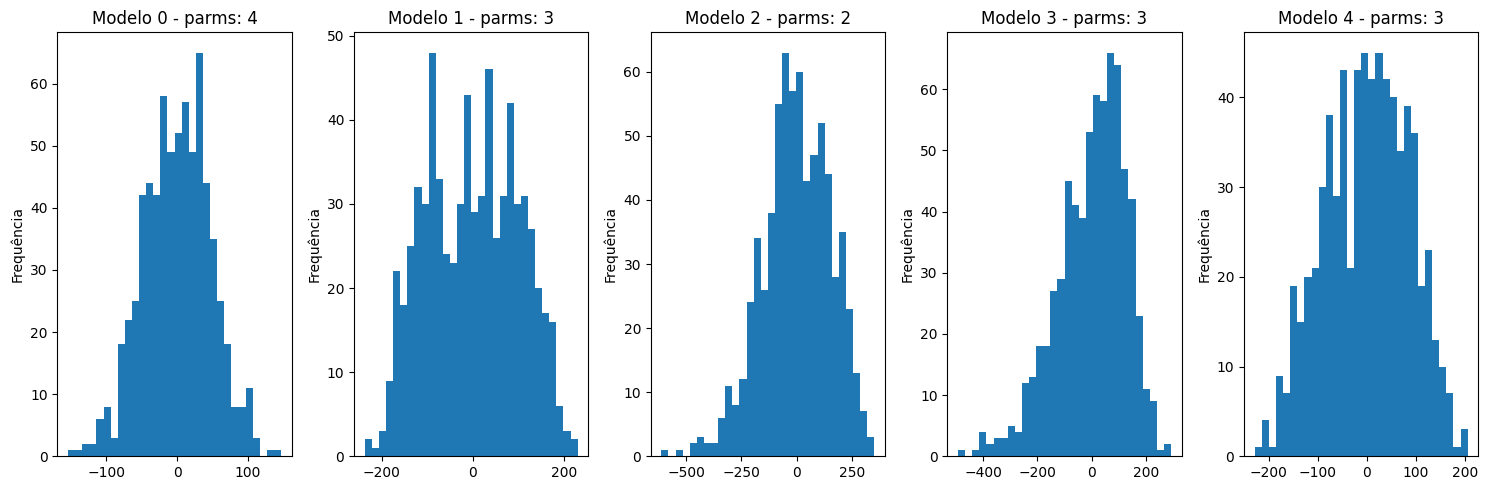

In [113]:
# Analise dos residuos de cada modelo
fig, axs = plt.subplots(1, len(modelos), figsize=(15, 5))

for i, modelo in enumerate(modelos):
  axs[i].hist(modelo.resid, bins=30)
  axs[i].set_title(f'Modelo {i} - parms: {len(parametros[i])}')
  axs[i].set_ylabel('Frequência')

plt.tight_layout()
plt.show()

In [114]:
# Fazendo as previsões:
y_predict = [] # Initialize y_predict as an empty list

resumo = []

for i, modelo in enumerate(modelos):
  y_predict.append(modelo.predict(X_test[parametros[i]]))
  resumo.append({ 'Modelo' : i,
                  'Sumario': modelo.summary(),
                  'R2-Treino': modelo.rsquared,
                  'R2-Teste': r2_score(y_test, y_predict[i]),
                  'Parametros': parametros[i],
                  })
  print(f' Modelo {i} - R²: {modelo.rsquared:.4f} - {len(modelo.params)} parametros: {parametros[i]}')
  print(f' Teste    - R²: {r2_score(y_test, y_predict[i]):.4f}')
  print('----------------------------------------------------------------------------------------------')

 Modelo 0 - R²: 0.9203 - 4 parametros: ['const', 'Estrelas', 'ProximidadeTurismo', 'Capacidade']
 Teste    - R²: 0.9278
----------------------------------------------------------------------------------------------
 Modelo 1 - R²: 0.6389 - 3 parametros: ['const', 'Estrelas', 'ProximidadeTurismo']
 Teste    - R²: 0.6690
----------------------------------------------------------------------------------------------
 Modelo 2 - R²: 0.1488 - 2 parametros: ['const', 'Estrelas']
 Teste    - R²: 0.1785
----------------------------------------------------------------------------------------------
 Modelo 3 - R²: 0.4302 - 3 parametros: ['const', 'Estrelas', 'Capacidade']
 Teste    - R²: 0.4957
----------------------------------------------------------------------------------------------
 Modelo 4 - R²: 0.7389 - 3 parametros: ['const', 'ProximidadeTurismo', 'Capacidade']
 Teste    - R²: 0.7678
----------------------------------------------------------------------------------------------


In [115]:
resumo

[{'Modelo': 0,
  'Sumario': <class 'statsmodels.iolib.summary.Summary'>
  """
                              OLS Regression Results                            
  Dep. Variable:                  Preco   R-squared:                       0.920
  Model:                            OLS   Adj. R-squared:                  0.920
  Method:                 Least Squares   F-statistic:                     2680.
  Date:                Thu, 24 Jul 2025   Prob (F-statistic):               0.00
  Time:                        21:51:46   Log-Likelihood:                -3690.1
  No. Observations:                 700   AIC:                             7388.
  Df Residuals:                     696   BIC:                             7406.
  Df Model:                           3                                         
  Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
  ---------------------

In [116]:
r2_data = []
for model in resumo:
    r2_data.append({'Modelo': model['Modelo'], 'R2-Treino': model['R2-Treino'], 'R2-Teste': model['R2-Teste']})

r2_df = pd.DataFrame(r2_data)
r2_df

,Modelo,R2-Treino,R2-Teste
0,0,0.920342,0.927785
1,1,0.638853,0.668952
2,2,0.148804,0.178528
3,3,0.430214,0.495667
4,4,0.738877,0.767751


<Axes: xlabel='Modelo'>

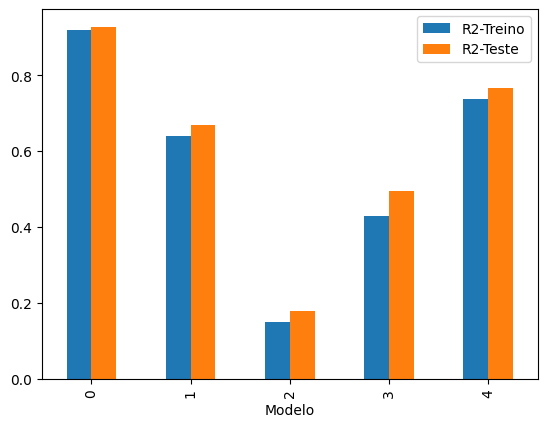

In [117]:
r2_df.plot(x='Modelo', y=['R2-Treino', 'R2-Teste'], kind='bar')

# New Section